In [42]:
'''
Visualize the data generated from src/cut_and_project/three_dim_commuting.py
'''
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data_folder = '../data/three_dim_commuting/'
n = 4

Number of points: 348


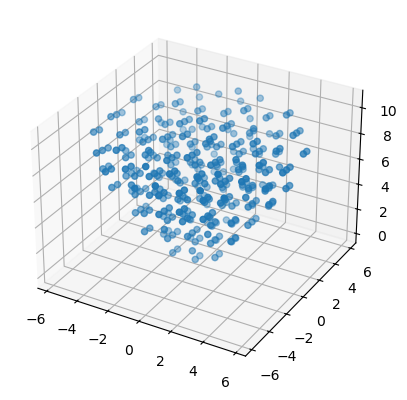

In [43]:
# visualize points in 3D
proj_pts = np.load(os.path.join(data_folder, f'proj_pts_n={n}.npy'))
n_points = proj_pts.shape[1]
print(f'Number of points: {n_points}')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_pts[0, :], proj_pts[1, :], proj_pts[2, :])
plt.show()

In [44]:
# check anti-commutation between X and Z checks
new_hx_cc = np.load(os.path.join(data_folder, f'new_hx_cc_n={n}.npy'))
new_hx_vv = np.load(os.path.join(data_folder, f'new_hx_vv_n={n}.npy'))
new_hz_cc = np.load(os.path.join(data_folder, f'new_hz_cc_n={n}.npy'))
new_hz_vv = np.load(os.path.join(data_folder, f'new_hz_vv_n={n}.npy'))

In [45]:
new_hx = np.hstack([new_hx_cc, new_hx_vv])
new_hz = np.hstack([new_hz_cc, new_hz_vv])

In [46]:
anti_comm_mat_x = (new_hx @ new_hz.T) % 2

In [47]:
print(anti_comm_mat_x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
for i in range(len(anti_comm_mat_x)):
    print(f'Row {i}: {np.sum(anti_comm_mat_x[i])}')

Row 0: 0
Row 1: 0
Row 2: 0
Row 3: 2
Row 4: 0
Row 5: 2
Row 6: 2
Row 7: 5
Row 8: 3
Row 9: 2
Row 10: 3
Row 11: 2
Row 12: 4
Row 13: 2
Row 14: 4
Row 15: 0
Row 16: 0
Row 17: 0
Row 18: 1
Row 19: 1
Row 20: 0
Row 21: 3
Row 22: 3
Row 23: 0
Row 24: 2
Row 25: 1
Row 26: 5
Row 27: 4
Row 28: 0
Row 29: 2
Row 30: 3
Row 31: 2
Row 32: 2
Row 33: 5
Row 34: 5
Row 35: 0
Row 36: 1
Row 37: 0
Row 38: 1
Row 39: 0
Row 40: 2
Row 41: 3
Row 42: 0
Row 43: 2
Row 44: 1
Row 45: 2
Row 46: 0
Row 47: 3
Row 48: 1
Row 49: 2
Row 50: 1
Row 51: 0
Row 52: 0
Row 53: 1
Row 54: 4
Row 55: 0
Row 56: 0
Row 57: 0
Row 58: 0
Row 59: 1
Row 60: 3
Row 61: 1
Row 62: 5
Row 63: 1
Row 64: 4
Row 65: 4
Row 66: 0
Row 67: 0
Row 68: 0
Row 69: 1
Row 70: 2
Row 71: 1
Row 72: 1
Row 73: 0
Row 74: 1
Row 75: 3
Row 76: 2
Row 77: 5
Row 78: 2
Row 79: 0
Row 80: 4
Row 81: 2
Row 82: 0
Row 83: 0
Row 84: 1
Row 85: 0
Row 86: 2
Row 87: 1
Row 88: 1
Row 89: 0
Row 90: 0
Row 91: 0
Row 92: 2
Row 93: 0
Row 94: 0
Row 95: 0
Row 96: 1
Row 97: 1
Row 98: 0
Row 99: 2
Row 100: 4

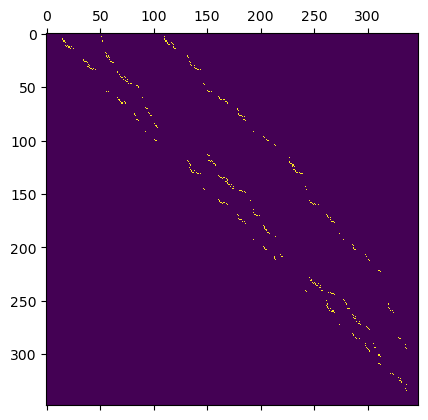

In [49]:
# visualize the anti-commutation matrix
plt.matshow(anti_comm_mat_x)

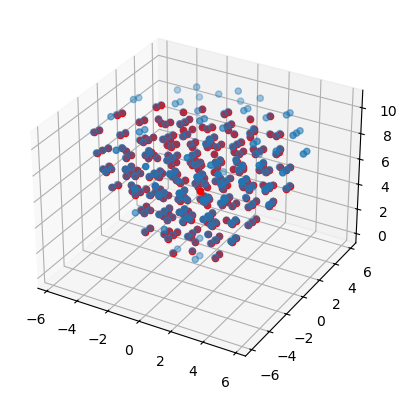

In [50]:
# visualize in 3D
# X part
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_pts[0, :], proj_pts[1, :], proj_pts[2, :])
for i in range(proj_pts.shape[1]):
    if np.sum(anti_comm_mat_x[i, :]) or np.sum(anti_comm_mat_x[:, i]):
        ax.scatter(proj_pts[0, i], proj_pts[1, i], proj_pts[2, i], c='r')

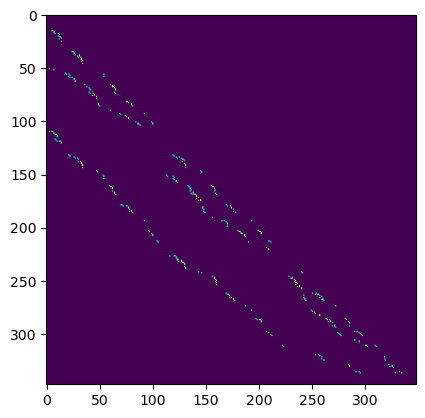

In [51]:
# Z part
anti_comm_mat_z = (new_hz @ new_hx.T) % 2
np.save(os.path.join(data_folder, f'anti_comm_mat_z_n={n}.txt'), anti_comm_mat_z)
plt.imshow(anti_comm_mat_z)

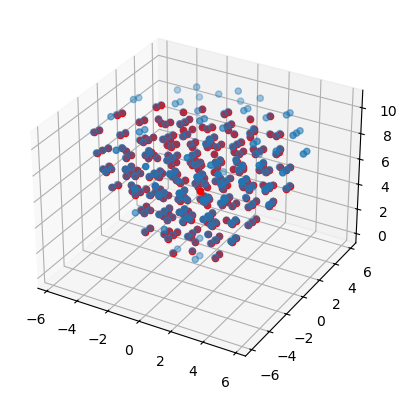

In [52]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_pts[0, :], proj_pts[1, :], proj_pts[2, :])
for i in range(proj_pts.shape[1]):
    if np.sum(anti_comm_mat_z[i, :]) or np.sum(anti_comm_mat_z[:, i]):
        ax.scatter(proj_pts[0, i], proj_pts[1, i], proj_pts[2, i], c='r')
plt.show()